In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Linear_train.csv to Linear_train.csv


In [ ]:
df=pd.read_csv("Linear_train.csv",index_col=0)
df.head()

In [4]:
xa=df.drop(["label"],axis=1)

In [ ]:
xa

In [ ]:
ya=df[['label']]
ya

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xa_norm = scaler.fit_transform(xa)

In [36]:
def linear_reg_model(X,Y,alpha,iteration):
  m = X.shape[0]
  ones = np.ones((m,1),dtype = float)
  costlist =[]
  X = np.concatenate((ones,X),axis = 1)
  n = X.shape[1] 
  theta = np.ones((n,1),dtype=float)
  for i in range(iteration): 
    h =np.dot(X,theta)
    error = h-Y
    sqerror = np.square(h-Y)
    cost = 1/(2*m)*(np.sum(sqerror))
    costlist.append(cost)
    theta = theta-(alpha/m)*(np.dot(X.transpose(),error))
    if i%10 == 0:
      print ("cost= {}".format(costlist))

  return costlist,theta





In [ ]:
costlist,theta = linear_reg_model(xa_norm,ya,0.01,10000)
print(theta)

Streaming output truncated to the last 5000 lines.
dtype: float64, label    351360.642902
dtype: float64, label    344434.226
dtype: float64, label    337645.138117
dtype: float64, label    330990.655611
dtype: float64, label    324468.108876
dtype: float64, label    318074.88127
dtype: float64, label    311808.408058
dtype: float64, label    305666.175388
dtype: float64, label    299645.719279
dtype: float64, label    293744.624633
dtype: float64, label    287960.52426
dtype: float64, label    282291.097934
dtype: float64, label    276734.071455
dtype: float64, label    271287.215742
dtype: float64, label    265948.34593
dtype: float64, label    260715.320499
dtype: float64, label    255586.040412
dtype: float64, label    250558.448271
dtype: float64, label    245630.527489
dtype: float64, label    240800.301486
dtype: float64, label    236065.83289
dtype: float64, label    231425.22276
dtype: float64, label    226876.609824
dtype: float64, label    222418.169733
dtype: float64, label

In [31]:
np.shape(theta)

(21, 1)

In [ ]:
print(costlist)

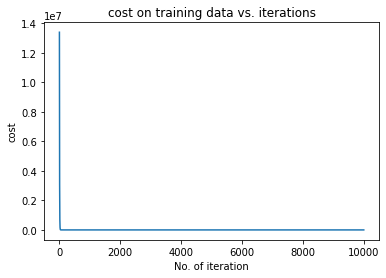

In [33]:

plt.title("cost on training data vs. iterations") 
plt.xlabel("No. of iteration") 
plt.ylabel("cost") 
plt.plot(costlist) 
plt.show()

In [13]:
uploaded = files.upload()

Saving Linear_test.csv to Linear_test.csv


In [ ]:
dft=pd.read_csv("Linear_test.csv",index_col = 0)
dft.head()

In [15]:
x_test = dft.drop(["label"],axis = 1) 

In [16]:
np.shape(x_test)

(10000, 20)

In [17]:
y_test = dft[['label']]

In [18]:
ones = np.ones((x_test.shape[0],1),dtype= int)

In [19]:
x_test = np.concatenate((ones,x_test),axis = 1)

In [20]:
np.shape(x_test)

(10000, 21)

In [21]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_test)
x_test_norm = norm.transform(x_test)

In [22]:
y_pred = np.dot(x_test_norm,theta)

In [25]:
y_test

,label
0,-163.522723
1,6484.664510
2,2393.818082
3,-9397.072355
4,10487.323575
...,...
9995,-7526.092452
9996,6133.716734
9997,-1404.204034
9998,1972.371711


In [24]:
y_pred

array([[11889.22120874],
       [18703.00308042],
       [14214.52197172],
       ...,
       [10454.16766434],
       [13806.76507016],
       [ 5814.47201789]])

In [27]:
d = y_test-y_pred
rootmeansq = ((np.dot(np.transpose(d),d))/10000)**(0.5)
rootmeansq

array([[12082.60324291]])